> **提示**：欢迎参加“调查数据集”项目！引用段会添加这类提示，来帮助你制定调查方法。在你提交项目之前，你可以浏览一下报告，将这一段删除，以保持报告的简洁性。首先，你需要双击该 Markdown 框(cell)，将标题更改为与数据集和调查相关的标题。

# 项目：调查数据集（NCIS 枪支数据分析）

## 目录
<ul>
    <li><a href="#intro">简介</a></li>
    <li><a href="#wrangling">数据整理</a></li>
    <li><a href="#eda">探索性数据分析</a></li>
    <li><a href="#conclusions">结论</a></li>
    <li><a href="#reference">参考</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在报告的这一部分，你需要首先对已选择进行分析的数据集进行简要的介绍。在这一部分末尾，对你计划在报告过程中探索的问题进行描述。你需要建立至少包含一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，请务必先熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *
from IPython import display
import zipfile
import seaborn as sn

%matplotlib inline

In [2]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。

# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

with zipfile.ZipFile("./ncis-and-census-data.zip") as zfile:
    for filename in zfile.namelist():
        with zfile.open(filename, 'r') as data:
            if filename.endswith("xlsx"):
                    df_gun = pd.read_excel(data)
            else:
                df_census = pd.read_csv(data,sep=",", thousands=',')

In [3]:
df_census.sample(10)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
74,(c),Economic Census - Puerto Rico data are not com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,"Nonminority-owned firms, 2012",NaN,"272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
10,"Female persons, percent, July 1, 2016, (V2016)",NaN,51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
79,F,Fewer than 25 firms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,"Median household income (in 2015 dollars), 201...",NaN,"$43,623","$72,515","$50,255","$41,371","$61,818","$60,629","$70,331","$60,509",...,50957,45219,"$53,207","$60,727","$55,176","$65,015","$61,062","$41,751","$53,357","$58,840"
26,Median selected monthly owner costs -with a mo...,NaN,"$1,139","$1,827","$1,343","$1,019","$2,155","$1,577","$2,067","$1,537",...,1210,1181,"$1,432","$1,428","$1,535","$1,711","$1,731",$966,"$1,402","$1,348"
78,D,Suppressed to avoid disclosure of confidential...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [6]:
df_gun.shape, df_census.shape

((12485, 27), (85, 52))

<font color="blue">**分析问题：**
    
分别对枪支数据和人口调查数据进行分析：

1. 枪支数据中包括了 27 个字段和 12,485 个数据点；此外在人口调查数据中包括了 52 个字段和 85 个数据点
2. 分析的角度主要包括：
    * 枪支购买的整体趋势是什么？
    * 不同枪支类型的购买趋势
    * 什么样的人口普查数据与人均拥有枪支量高度相关
    * 哪些州的枪支增长率最高
</font>

<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [7]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
display.display_html(
    "<h3>The Gun data with %s rows and %s columns</h3>" % 
    (df_gun.shape[0], df_gun.shape[1]), raw=True)
for i in sorted(df_gun.columns):
    print("column: {0:<30}, data: {1:<30}".format(i, df_gun.loc[0, i]))

The Gun data with 12485 rows and 27 columns

column: admin                         , data: 0.0                           
column: handgun                       , data: 5734.0                        
column: long_gun                      , data: 6320.0                        
column: month                         , data: 2017-09                       
column: multiple                      , data: 317                           
column: other                         , data: 221.0                         
column: permit                        , data: 16717.0                       
column: permit_recheck                , data: 0.0                           
column: prepawn_handgun               , data: 15.0                          
column: prepawn_long_gun              , data: 21.0                          
column: prepawn_other                 , data: 2.0                           
column: private_sale_handgun          , data: 9.0                           
column: private_sale_long_gun         , data: 16.0                          

In [8]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [9]:
display.display_html(
    "<h3>The Census data with %s rows and %s columns</h3>" % 
    (df_census.shape[0], df_census.shape[1]), raw=True)
for i in sorted(df_census.columns):
    print("column: {0:<30}, data: {1:<30}".format(i, df_census.loc[0, i]))

The Census data with 85 rows and 52 columns

column: Alabama                       , data: 4,863,300                     
column: Alaska                        , data: 741,894                       
column: Arizona                       , data: 6,931,071                     
column: Arkansas                      , data: 2,988,248                     
column: California                    , data: 39,250,017                    
column: Colorado                      , data: 5,540,545                     
column: Connecticut                   , data: 3,576,452                     
column: Delaware                      , data: 952,065                       
column: Fact                          , data: Population estimates, July 1, 2016,  (V2016)
column: Fact Note                     , data: nan                           
column: Florida                       , data: 20,612,439                    
column: Georgia                       , data: 10,310,371                    
column: Hawaii                        , data: 1,428,557       

In [10]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [11]:
df_census.Fact.unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

In [12]:
df_gun.sample(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
106,2017-08,Washington,12068.0,51.0,13788.0,9776.0,1529.0,623,6.0,1.0,...,8.0,0.0,0.0,760.0,628.0,29.0,6.0,15.0,1.0,42120
10406,2001-12,Guam,0.0,NaN,21.0,10.0,NaN,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
2434,2014-01,Illinois,89150.0,NaN,20164.0,11190.0,0.0,784,0.0,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,121288
11503,2000-04,District of Columbia,0.0,NaN,3.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1289,2015-10,Michigan,16387.0,NaN,10948.0,13244.0,341.0,208,2113.0,0.0,...,0.0,NaN,NaN,6.0,2.0,1.0,0.0,0.0,0.0,43822
8726,2004-07,North Dakota,149.0,NaN,312.0,1493.0,NaN,13,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2135
6505,2007-11,Indiana,0.0,NaN,6508.0,14549.0,NaN,266,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21950
8342,2005-02,Ohio,0.0,NaN,12848.0,13380.0,NaN,675,0.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28879
11615,2000-02,Georgia,3863.0,NaN,9255.0,9820.0,NaN,256,10920.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34114
2386,2014-02,Mariana Islands,0.0,NaN,0.0,1.0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1


In [13]:
df_gun.iloc[0, 2:]

permit                       16717
permit_recheck                   0
handgun                       5734
long_gun                      6320
other                          221
multiple                       317
admin                            0
prepawn_handgun                 15
prepawn_long_gun                21
prepawn_other                    2
redemption_handgun            1378
redemption_long_gun           1262
redemption_other                 1
returned_handgun                 0
returned_long_gun                0
returned_other                   0
rentals_handgun                  0
rentals_long_gun                 0
private_sale_handgun             9
private_sale_long_gun           16
private_sale_other               3
return_to_seller_handgun         0
return_to_seller_long_gun        0
return_to_seller_other           3
totals                       32019
Name: 0, dtype: object

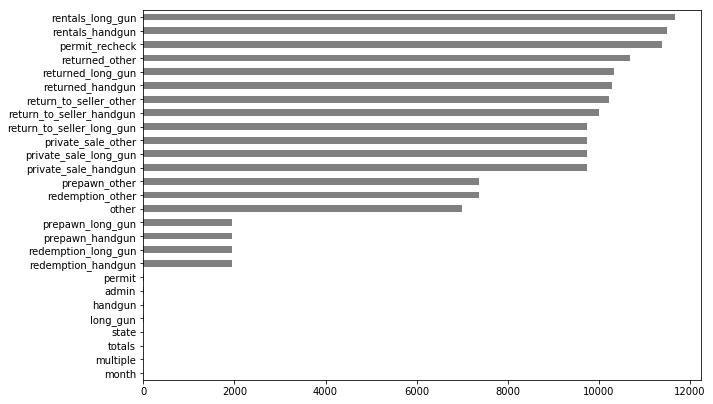

In [14]:
df_gun.isnull().sum().sort_values(ascending=True).plot(kind="barh", color="grey", figsize=(10, 6.8));

<font color="blue">**数据评估：**
    
对人口调查数据进行评估：

1. 存在 1 行数据缺失（其中仅有 Fact Note 有一个数据
2. 包括非必要数据，例如制造业、零售业等统计数据已经非必要年份数据
3. 非信息字段 Fact Note
4. 数据格式保留了千分位逗号
5. 百分比和小数点表示混用

对枪支数据进行评估：

1. month 数据是以字符串形式保存，非日期时间形式
2. 数据存在缺失值

</font>

> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 数据清理（请用更具体的标题来代替该标题。）

In [15]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。
# drop missing value in census
df_census.dropna(subset=["Fact"], inplace=True)
df_census.shape

(80, 52)

In [16]:
# drop the non-information column
df_census.drop("Fact Note", inplace=True, axis=1)

In [17]:
# select the population information
census_infor = [
    "Population estimates, July 1, 2016,  (V2016)",
    "Population, Census, April 1, 2010",
    "Female persons, percent,  July 1, 2016,  (V2016)",
    "Female persons, percent, April 1, 2010",
    "White alone, percent, July 1, 2016,  (V2016)",
    "Black or African American alone, percent, July 1, 2016,  (V2016)",
    "Housing units,  July 1, 2016,  (V2016)",
    "Housing units, April 1, 2010",
    "Population per square mile, 2010",
]
df_census_population = df_census[df_census.Fact.map(lambda x: x in census_infor)].reset_index(drop=True)

In [18]:
df_census_population

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
2,"Female persons, percent, July 1, 2016, (V2016)",51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
3,"Female persons, percent, April 1, 2010",51.50%,48.00%,50.30%,50.90%,50.30%,49.90%,51.30%,51.60%,51.10%,...,0.5,0.513,50.40%,49.80%,50.70%,50.90%,50.20%,50.70%,50.40%,49.00%
4,"White alone, percent, July 1, 2016, (V2016)",69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,77.60%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
5,"Black or African American alone, percent, July...",26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,16.80%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
6,"Housing units, July 1, 2016, (V2016)","2,230,185","310,658","2,961,003","1,354,762","14,060,525","2,339,118","1,499,116","426,149","9,301,642",...,383838,2919671,"10,753,629","1,054,164","329,525","3,491,054","3,025,685","886,640","2,668,444","270,600"
7,"Housing units, April 1, 2010","2,171,853","306,967","2,844,526","1,316,299","13,680,081","2,212,898","1,487,891","405,885","8,989,580",...,363438,2812133,"9,977,436","979,709","322,539","3,364,939","2,885,677","881,917","2,624,358","261,868"
8,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8


In [19]:
for i in df_census_population.Fact:
    print(i)

Population estimates, July 1, 2016,  (V2016)
Population, Census, April 1, 2010
Female persons, percent,  July 1, 2016,  (V2016)
Female persons, percent, April 1, 2010
White alone, percent, July 1, 2016,  (V2016)
Black or African American alone, percent, July 1, 2016,  (V2016)
Housing units,  July 1, 2016,  (V2016)
Housing units, April 1, 2010
Population per square mile, 2010


In [20]:
# drop the information about the population per square mile and get the population change rate
if False:
    population_change_rate = df_census_population.iloc[2,:]
    df_census_population.drop([1, 2, 4], axis=0, inplace=True)

    df_census_population.reset_index(drop=True, inplace=True)

In [21]:
df_census_population.iloc[:, 1:]

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
2,51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,51.30%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
3,51.50%,48.00%,50.30%,50.90%,50.30%,49.90%,51.30%,51.60%,51.10%,51.20%,...,0.5,0.513,50.40%,49.80%,50.70%,50.90%,50.20%,50.70%,50.40%,49.00%
4,69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,77.60%,61.20%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
5,26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,16.80%,32.00%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
6,"2,230,185","310,658","2,961,003","1,354,762","14,060,525","2,339,118","1,499,116","426,149","9,301,642","4,218,776",...,383838,2919671,"10,753,629","1,054,164","329,525","3,491,054","3,025,685","886,640","2,668,444","270,600"
7,"2,171,853","306,967","2,844,526","1,316,299","13,680,081","2,212,898","1,487,891","405,885","8,989,580","4,088,801",...,363438,2812133,"9,977,436","979,709","322,539","3,364,939","2,885,677","881,917","2,624,358","261,868"
8,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,168.4,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8


In [22]:
def change_percent(x):
    if "%" in x:
        x = x.replace("%", "")
        return float(x) / 100
    else:
        return float(x)

df_census_population.iloc[:, 1:] = df_census_population.iloc[:, 1:].replace(",", "", regex=True)
df_census_population.iloc[df_census_population.Fact.str.contains("percent").values, 1:] = \
    df_census_population.iloc[df_census_population.Fact.str.contains("percent").values, 1:].applymap(change_percent)

In [23]:
df_census_population.iloc[:, 1:]

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,10310371,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,9687653,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
2,0.516,0.477,0.503,0.509,0.503,0.497,0.512,0.516,0.511,0.513,...,0.496,0.512,0.504,0.497,0.506,0.508,0.5,0.505,0.503,0.489
3,0.515,0.48,0.503,0.509,0.503,0.499,0.513,0.516,0.511,0.512,...,0.5,0.513,0.504,0.498,0.507,0.509,0.502,0.507,0.504,0.49
4,0.693,0.661,0.833,0.794,0.727,0.875,0.806,0.701,0.776,0.612,...,0.852,0.787,0.794,0.911,0.946,0.7,0.8,0.936,0.875,0.928
5,0.268,0.038,0.049,0.157,0.065,0.045,0.118,0.226,0.168,0.32,...,0.02,0.171,0.126,0.014,0.013,0.198,0.041,0.036,0.066,0.013
6,2230185,310658,2961003,1354762,14060525,2339118,1499116,426149,9301642,4218776,...,383838,2919671,10753629,1054164,329525,3491054,3025685,886640,2668444,270600
7,2171853,306967,2844526,1316299,13680081,2212898,1487891,405885,8989580,4088801,...,363438,2812133,9977436,979709,322539,3364939,2885677,881917,2624358,261868
8,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,168.4,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8


In [24]:
df_census_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 51 columns):
Fact              9 non-null object
Alabama           9 non-null object
Alaska            9 non-null object
Arizona           9 non-null object
Arkansas          9 non-null object
California        9 non-null object
Colorado          9 non-null object
Connecticut       9 non-null object
Delaware          9 non-null object
Florida           9 non-null object
Georgia           9 non-null object
Hawaii            9 non-null object
Idaho             9 non-null object
Illinois          9 non-null object
Indiana           9 non-null object
Iowa              9 non-null object
Kansas            9 non-null object
Kentucky          9 non-null object
Louisiana         9 non-null object
Maine             9 non-null object
Maryland          9 non-null object
Massachusetts     9 non-null object
Michigan          9 non-null object
Minnesota         9 non-null object
Mississippi       9 non-null object

In [25]:
# change the dtype
for column in df_census_population.iloc[:, 1:].columns:
    df_census_population[column] = df_census_population[column].apply(float)

df_census_population[df_census_population.Fact.filter(regex="percent", axis=0)] = \
    df_census_population[df_census_population.Fact.filter(regex="percent", axis=0)].apply(lambda x: x / 100)

In [26]:
df_census_population

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4863300.000,741894.000,6931071.000,2988248.000,3.925002e+07,5540545.000,3576452.000,952065.000,2.061244e+07,...,865454.000,6651194.000,2.786260e+07,3051217.000,624594.000,8411808.000,7288000.000,1831102.000,5778708.000,585501.000
1,"Population, Census, April 1, 2010",4779736.000,710231.000,6392017.000,2915918.000,3.725396e+07,5029196.000,3574097.000,897934.000,1.880131e+07,...,814180.000,6346105.000,2.514556e+07,2763885.000,625741.000,8001024.000,6724540.000,1852994.000,5686986.000,563626.000
2,"Female persons, percent, July 1, 2016, (V2016)",0.516,0.477,0.503,0.509,5.030000e-01,0.497,0.512,0.516,5.110000e-01,...,0.496,0.512,5.040000e-01,0.497,0.506,0.508,0.500,0.505,0.503,0.489
3,"Female persons, percent, April 1, 2010",0.515,0.480,0.503,0.509,5.030000e-01,0.499,0.513,0.516,5.110000e-01,...,0.500,0.513,5.040000e-01,0.498,0.507,0.509,0.502,0.507,0.504,0.490
4,"White alone, percent, July 1, 2016, (V2016)",0.693,0.661,0.833,0.794,7.270000e-01,0.875,0.806,0.701,7.760000e-01,...,0.852,0.787,7.940000e-01,0.911,0.946,0.700,0.800,0.936,0.875,0.928
5,"Black or African American alone, percent, July...",0.268,0.038,0.049,0.157,6.500000e-02,0.045,0.118,0.226,1.680000e-01,...,0.020,0.171,1.260000e-01,0.014,0.013,0.198,0.041,0.036,0.066,0.013
6,"Housing units, July 1, 2016, (V2016)",2230185.000,310658.000,2961003.000,1354762.000,1.406052e+07,2339118.000,1499116.000,426149.000,9.301642e+06,...,383838.000,2919671.000,1.075363e+07,1054164.000,329525.000,3491054.000,3025685.000,886640.000,2668444.000,270600.000
7,"Housing units, April 1, 2010",2171853.000,306967.000,2844526.000,1316299.000,1.368008e+07,2212898.000,1487891.000,405885.000,8.989580e+06,...,363438.000,2812133.000,9.977436e+06,979709.000,322539.000,3364939.000,2885677.000,881917.000,2624358.000,261868.000
8,"Population per square mile, 2010",94.400,1.200,56.300,56.000,2.391000e+02,48.500,738.100,460.800,3.506000e+02,...,10.700,153.900,9.630000e+01,33.600,67.900,202.600,101.200,77.100,105.000,5.800


In [27]:
for i in df_census_population.Fact:
    print(i)

Population estimates, July 1, 2016,  (V2016)
Population, Census, April 1, 2010
Female persons, percent,  July 1, 2016,  (V2016)
Female persons, percent, April 1, 2010
White alone, percent, July 1, 2016,  (V2016)
Black or African American alone, percent, July 1, 2016,  (V2016)
Housing units,  July 1, 2016,  (V2016)
Housing units, April 1, 2010
Population per square mile, 2010


In [28]:
# change the fact information
change_fact_infor = {
    "Population estimates, July 1, 2016,  (V2016)": "2016_EstimatesPopulation",
    "Population, Census, April 1, 2010": "2010_Population",
    "Female persons, percent,  July 1, 2016,  (V2016)": "2016_FemalePercent",
    "Female persons, percent, April 1, 2010": "2010_FemalePercent",
    "White alone, percent, July 1, 2016,  (V2016)": "2016_WhitePercent",
    "Black or African American alone, percent, July 1, 2016,  (V2016)": "2016_AficanAmericanPercent",
    "Housing units,  July 1, 2016,  (V2016)": "2016_HousingUnits",
    "Housing units, April 1, 2010": "2010_HousingUnits",
    "Population per square mile, 2010": "2010_PopulationPerSquare",
}
df_census_population["Fact"] = df_census_population["Fact"].map(change_fact_infor)

In [29]:
# check whether the data record is right
total_report = "<p style='font: italic 25px Georgia, serif;'>The amount of the different type guns are <b style='color:#00ffff;'>{}</b> with total record in the dataset.</p>"
if df_gun.sum()[2:-1].sum() == df_gun.sum()["totals"]:
    display.display_html(total_report.format("Equal"), raw=True)
else:
    display.display_html(total_report.format("Not Equal"), raw=True)

The amount of the different type guns are Equal with total record in the dataset.

In [30]:
# fill the missing value with zero
df_gun.fillna(0, inplace=True)

In [31]:
df_gun.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [32]:
# extract the information about the field month
df_gun["date"] = pd.to_datetime(df_gun["month"], format="%Y-%m")
df_gun["year"] = df_gun["date"].dt.year
df_gun["month"] = df_gun["date"].dt.month

In [33]:
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,date,year
0,9,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017-09-01,2017
1,9,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017-09-01,2017
2,9,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017-09-01,2017
3,9,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017-09-01,2017
4,9,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017-09-01,2017


<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1 Gun Sales Trend 

In [34]:
# 用这个代码框和其它代码框探索数据。请务必记得添加
#   Markdown 框，以便记录你的观察和调查结果。
total_gun = df_gun.groupby('date')['totals'].sum()
total_gun_rate = (total_gun - total_gun.shift(1)) / total_gun.shift(1)
total_gun_rate.fillna(0, inplace=True)

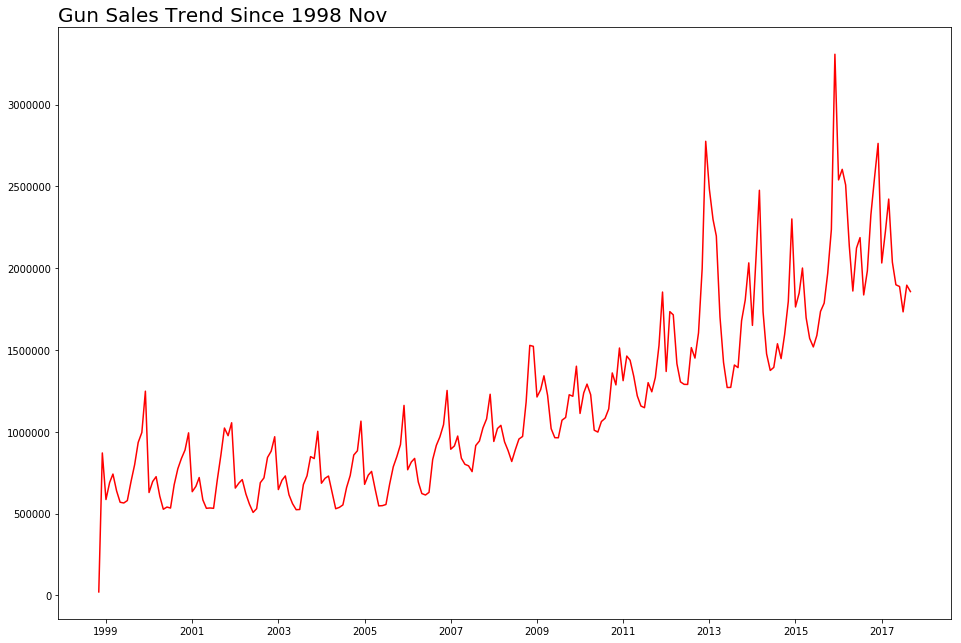

In [35]:
plt.figure(figsize=(16, 16*.68)) # set figsize
ax = plt.subplot() # axes
ax.plot(total_gun.index, total_gun.values, "r-", )
ax.set_title("Gun Sales Trend Since 1998 Nov", loc="left", fontsize=20)

# axes.Axes.set_xticklabels()

plt.show()

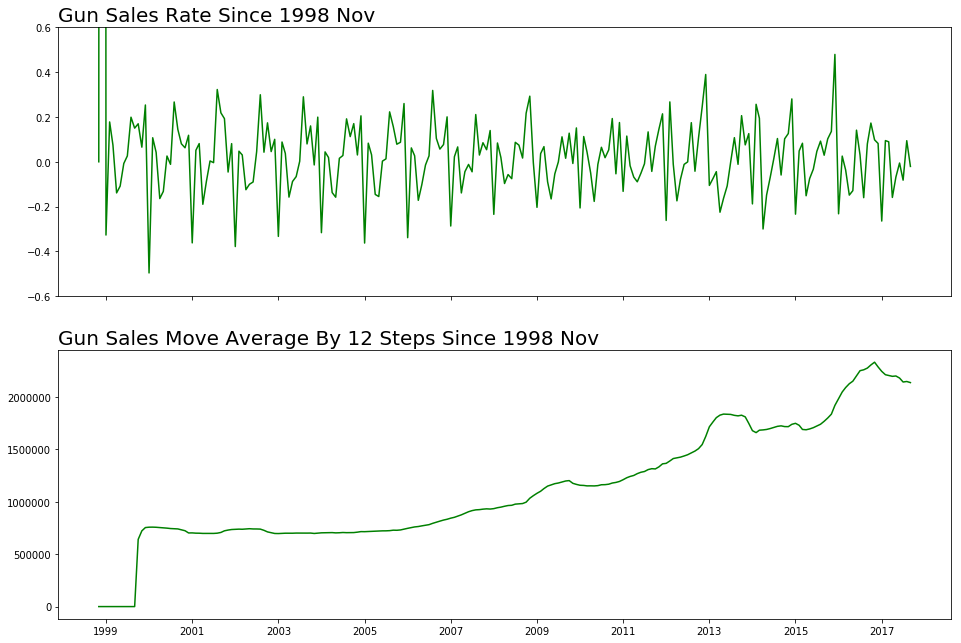

In [36]:
plt.figure(figsize=(16, 16 * 0.68))
ax = plt.subplot(211)
ax.plot(total_gun_rate.index, total_gun_rate.values, "g-", )
ax.set_title("Gun Sales Rate Since 1998 Nov", loc="left", fontsize=20)
ax.set_ylim(-0.6, 0.6)
ax.set_xticklabels([])

ax = plt.subplot(212)
ax.plot(total_gun.rolling(12).mean().index, total_gun.rolling(12).mean().fillna(0).values, "g-", )
ax.set_title("Gun Sales Move Average By 12 Steps Since 1998 Nov", loc="left", fontsize=20)

plt.show()

In [37]:
report = "<p style='font: italic 30px Fira Sans, serif; color: #000080;'>Since 1998 November, the gun sales amount increased in totally</p> \
    <ul style='font: italic 25px Fira Sans, serif;'> \
        <li>At {}, there were {} guns that flowed in the market, which was top 1 date</li> \
        <li>When focused on the sales rate,  there is a gun sales circle</li> \
        <li>So analysis the 12 months circle, the amount of gun increasing is so clear</li> \
    <ul>"

report = report.format(total_gun.idxmax().strftime("%Y %B"), total_gun[total_gun.idxmax()])
display.display_html(report, raw=True)

Since 1998 November, the gun sales amount increased in totally At 2015 December, there were 3308199 guns that flowed in the market, which was top 1 date When focused on the sales rate, there is a gun sales circle So analysis the 12 months circle, the amount of gun increasing is so clear

### 研究问题 2 Gun Trend With Main Different Type

In [38]:
df_gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'date', 'year'],
      dtype='object')

In [39]:
# 请继续探索数据，解决你额外的研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。
df_gun_types = df_gun.copy()

for i in ["handgun", "long_gun", "other"]:
    df_gun_types[i+"_all"] = df_gun_types[df_gun_types.columns[df_gun_types.columns.str.contains(i)]].sum(axis=1)
    
df_gun_types["permit_all"] = df_gun_types.filter(regex="permit", axis=1).sum(axis=1)
df_gun_types.rename({"admin": "admin_all", "multiple": "multiple_all"}, axis=1, inplace=True)

In [40]:
df_gun_types.filter(regex="_all$", axis=1).sample(10)

,multiple_all,admin_all,handgun_all,long_gun_all,other_all,permit_all
2980,658,0.0,18269.0,14975.0,364.0,19191.0
2681,24,0.0,1166.0,269.0,10.0,0.0
4359,630,0.0,11644.0,10778.0,0.0,36379.0
8284,34,10.0,1258.0,8029.0,0.0,3236.0
10311,227,0.0,6023.0,7666.0,0.0,0.0
3360,895,1.0,15970.0,13345.0,430.0,3563.0
9954,47,0.0,754.0,2329.0,0.0,160.0
57,627,0.0,12382.0,8393.0,915.0,7059.0
9253,123,0.0,1360.0,5315.0,0.0,893.0
1016,369,1.0,12441.0,6843.0,333.0,1740.0


In [41]:
# three_guns = df_gun_types[["date", "state", "permit_all", "handgun_all", "long_gun_all", "other_all", "totals"]].copy()
three_guns = df_gun_types.filter(regex="date|state|all$|totals").copy()

In [42]:
three_guns.dtypes

state                   object
multiple_all             int64
admin_all              float64
totals                   int64
date            datetime64[ns]
handgun_all            float64
long_gun_all           float64
other_all              float64
permit_all             float64
dtype: object

In [43]:
three_guns.select_dtypes(include=["number"]).sum() / three_guns.select_dtypes(include=["number"]).sum()["totals"]

multiple_all    0.012438
admin_all       0.002722
totals          1.000000
handgun_all     0.291197
long_gun_all    0.385062
other_all       0.007409
permit_all      0.301172
dtype: float64

In [44]:
(three_guns.select_dtypes(include=["number"]).sum() / three_guns.select_dtypes(include=["number"]).sum()["totals"]).sum()

2.0

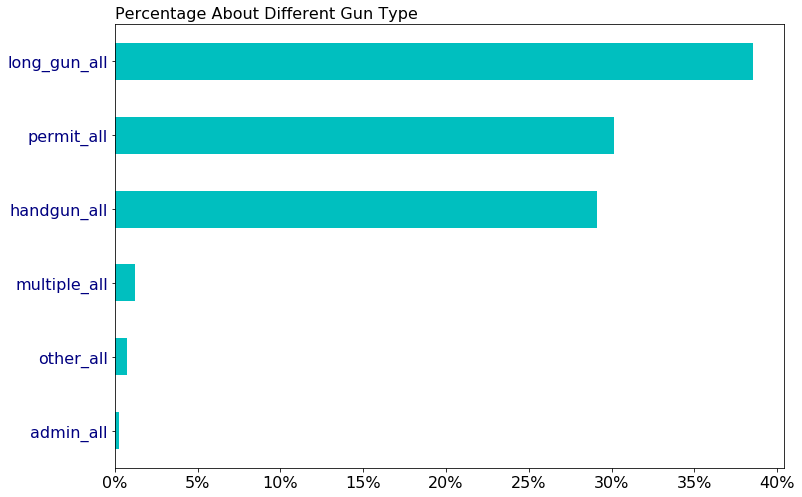

In [45]:
# (three_guns.select_dtypes(include=["number"]).sum() / 
#      three_guns.select_dtypes(include=["number"]).sum()["totals"]).plot(kind="bar")

plot_data = (three_guns.select_dtypes(include=["number"]).sum() / 
     three_guns.select_dtypes(include=["number"]).sum()["totals"]). \
                                                sort_values(). \
                                                filter(regex="all", axis=0) * 100

plot_data.plot(kind="barh", color="c", figsize=(12, 12*0.68))
ax = plt.gca()

ax.set_title("Percentage About Different Gun Type", fontsize=16, loc="left")
ax.set_yticklabels(plot_data.index, fontsize=16, color="#000080")
# set the percentage formater
formater = ticker.FormatStrFormatter("%0.f%%")
ax.xaxis.set_major_formatter(formater)

# set x fontsize 
for xtick in ax.get_xmajorticklabels():
    xtick.set_fontsize(16)

plt.show()

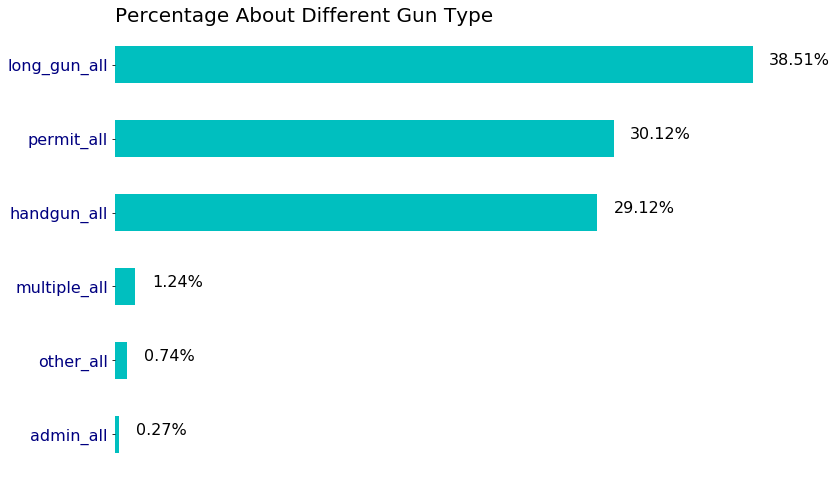

In [46]:
plot_data = (three_guns.select_dtypes(include=["number"]).sum() / 
     three_guns.select_dtypes(include=["number"]).sum()["totals"]). \
                                                sort_values(). \
                                                filter(regex="all", axis=0) * 100
# plt.axis("off")
plot_data.plot(kind="barh", color="c", figsize=(12, 12*0.68))
ax = plt.gca()

ax.set_title("Percentage About Different Gun Type", fontsize=20, loc="left")

ax.set_yticklabels(plot_data.index, fontsize=16, color="#000080")

# set the percentage formater
formater = ticker.FormatStrFormatter("%0.f%%")
ax.xaxis.set_major_formatter(formater)

# set x fontsize 
for ylocation, xtick in enumerate(ax.get_xmajorticklabels()):
    xtick.set_fontsize(16)

# set text
for y, x in enumerate(plot_data.values):
    plt.text(x+1, y, "%0.2f%%" % x, fontsize=16,)
    
# cancel waste material
ax.get_xaxis().set_visible(False)
for i in ["bottom", "top", "right", "left"]:
    ax.spines[i].set_visible(False)
    
plt.show()

In [47]:
three_guns.groupby("date").sum().reset_index().head()

,date,multiple_all,admin_all,totals,handgun_all,long_gun_all,other_all,permit_all
0,1998-11-01,275,60.0,21176,6859.0,11909.0,0.0,2073.0
1,1998-12-01,8445,2159.0,870722,213140.0,570882.0,0.0,76096.0
2,1999-01-01,7498,6993.0,585974,184496.0,309915.0,0.0,77072.0
3,1999-02-01,9226,11371.0,690215,232448.0,352411.0,0.0,84759.0
4,1999-03-01,9537,11154.0,741687,241036.0,376775.0,0.0,103185.0


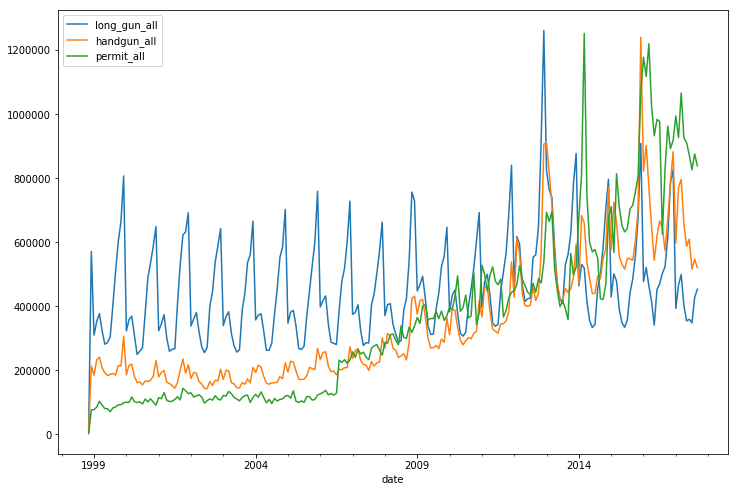

In [48]:
three_guns.groupby("date").sum().reset_index().plot(kind="line", x="date", y=["long_gun_all", "handgun_all", "permit_all"], figsize=(12, 12*.68), )


In [49]:
three_guns.groupby("date").sum().reset_index().filter(regex="all", axis=1).head()

,multiple_all,admin_all,handgun_all,long_gun_all,other_all,permit_all
0,275,60.0,6859.0,11909.0,0.0,2073.0
1,8445,2159.0,213140.0,570882.0,0.0,76096.0
2,7498,6993.0,184496.0,309915.0,0.0,77072.0
3,9226,11371.0,232448.0,352411.0,0.0,84759.0
4,9537,11154.0,241036.0,376775.0,0.0,103185.0


In [50]:
three_guns.groupby("date").sum().reset_index()["date"].head()

0   1998-11-01
1   1998-12-01
2   1999-01-01
3   1999-02-01
4   1999-03-01
Name: date, dtype: datetime64[ns]

In [51]:
three_guns_rolling = three_guns.groupby("date").sum().reset_index().filter(regex="all", axis=1).rolling(12).mean()
three_guns_rolling["date"] = three_guns.groupby("date").sum().reset_index()["date"]
# three_guns_rolling.fillna(0, inplace=True)

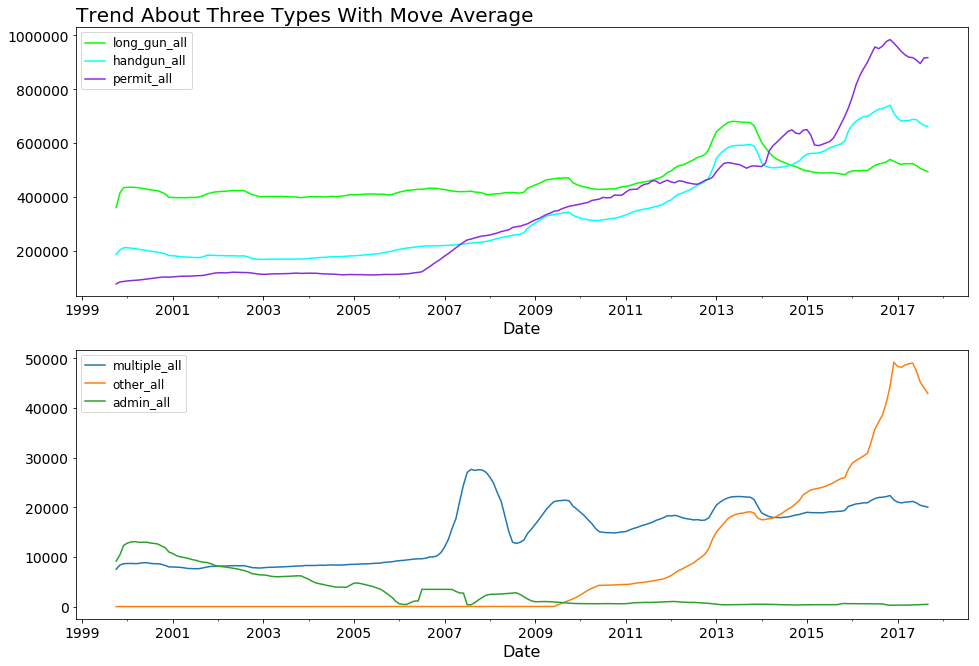

In [52]:
# high percentage gun
plt.figure(figsize=(16, 16*.68))
ax = plt.subplot(211)
three_guns_rolling.plot(kind="line", x="date", y=["long_gun_all", "handgun_all", "permit_all"], ax=ax)


ax.set_title("Trend About Three Types With Move Average", fontsize=20, loc="left")

ax.set_xlabel("Date", fontsize=16)

for xtick in ax.get_xmajorticklabels():
    xtick.set_fontsize(14)
    
for ytick in ax.get_ymajorticklabels():
    ytick.set_fontsize(14)
    
for i in ax.get_legend().get_texts():
    i.set_fontsize(12)
    
colors = ["#00ff00", "#00ffff", "#8a2be2"] #00ffff
c = 0
for i, l in zip(ax.get_lines(), ax.get_legend().get_lines()):
    i.set_color(colors[c])
    l.set_color(colors[c])
    c += 1

    
# low percentage gun 
ax = plt.subplot(212)

three_guns_rolling.plot(kind="line", x="date", y=["multiple_all", "other_all", "admin_all"], ax=ax)



ax.set_xlabel("Date", fontsize=16)

for xtick in ax.get_xmajorticklabels():
    xtick.set_fontsize(14)
    
for ytick in ax.get_ymajorticklabels():
    ytick.set_fontsize(14)
    
for i in ax.get_legend().get_texts():
    i.set_fontsize(12)

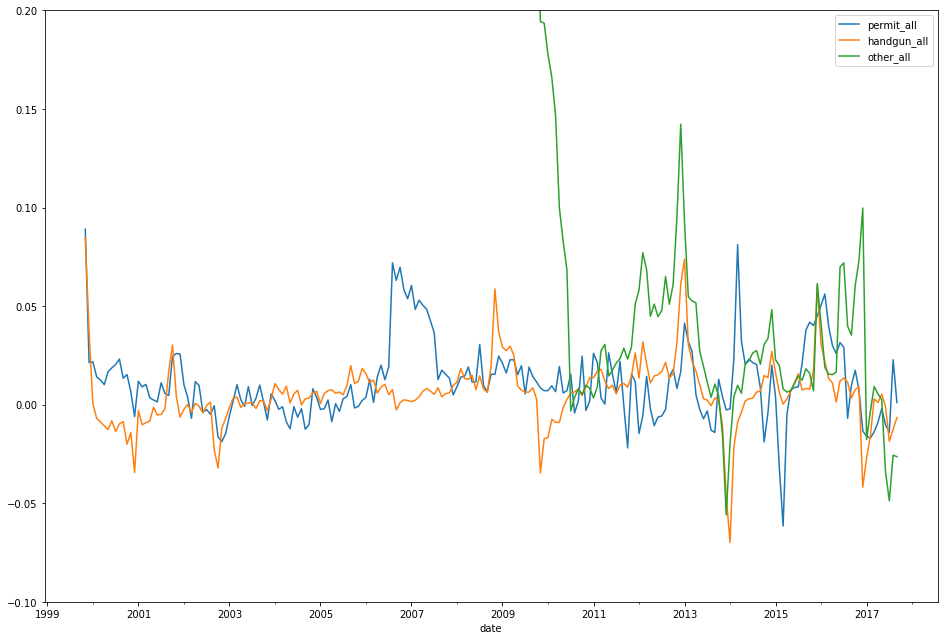

In [53]:
rolling_rate = ((three_guns_rolling.filter(regex="all", axis=1) - three_guns_rolling.filter(regex="all", axis=1).shift(1)) / 
     three_guns_rolling.filter(regex="all", axis=1))
rolling_rate["date"] = three_guns_rolling["date"]

rolling_rate.plot(kind="line", x="date", y=["permit_all", "handgun_all", "other_all"], figsize=(16, 16*.68))
plt.ylim(-.1, 0.2)
plt.show()

In [54]:
rolling_rate.corr()

,multiple_all,admin_all,handgun_all,long_gun_all,other_all,permit_all
multiple_all,1.000000,-0.189101,0.400367,0.374832,0.099113,0.345325
admin_all,-0.189101,1.000000,-0.035737,-0.029796,-0.219994,-0.073133
handgun_all,0.400367,-0.035737,1.000000,0.823061,0.048476,0.299799
long_gun_all,0.374832,-0.029796,0.823061,1.000000,0.114314,0.226983
other_all,0.099113,-0.219994,0.048476,0.114314,1.000000,0.067510
permit_all,0.345325,-0.073133,0.299799,0.226983,0.067510,1.000000


In [55]:
report = "<p style='font: italic 30px Fira Sans, serif; color: #000080;'>Since 1998 November, different type is different change</p> \
    <ul style='font: italic 25px Fira Sans, serif;'> \
        <li>The amount about other ,multiple and admin  was lower than other gun types</li> \
        <li>The amount of admin type descreased since 2009</li> \
        <li>The permit type increased quickly since 2007</li> \
        <li>There was a high corraltion between handgun and longgun, especially befor 2014</li> \
        <li>Change rate was so complex, but the ratio is between -0.1 and 0.2 in reguarly</li> \
    <ul>"

# report = report.format(total_gun.idxmax().strftime("%Y %B"), total_gun[total_gun.idxmax()])
display.display_html(report, raw=True)

Since 1998 November, different type is different change The amount about other ,multiple and admin was lower than other gun types The amount of admin type descreased since 2009 The permit type increased quickly since 2007 There was a high corraltion between handgun and longgun, especially befor 2014 Change rate was so complex, but the ratio is between -0.1 and 0.2 in reguarly

In [56]:
# check the state name
set(df_gun.state.unique()).difference(df_census.iloc[:, 1:].columns)

{'District of Columbia',
 'Guam',
 'Mariana Islands',
 'Puerto Rico',
 'Virgin Islands'}

In [57]:
df_census.columns.difference(set(df_gun.state.unique()))

Index(['Fact'], dtype='object')

In [58]:
df_gun_2010 = df_gun[df_gun.year == 2010]
df_gun_2016 = df_gun[df_gun.year == 2016]

In [59]:
df_gun_2010 = \
    df_gun_2010[df_gun_2010.state.map(
        lambda x: x not in set(df_gun_2010.state.unique()).difference(df_census.iloc[:, 1:].columns))]
df_gun_2016 = \
    df_gun_2016[df_gun_2016.state.map(
        lambda x: x not in set(df_gun_2016.state.unique()).difference(df_census.iloc[:, 1:].columns))]

In [60]:
df_gun_2010 = df_gun_2010.groupby(["state", "date"])["totals"].sum().reset_index()

In [61]:
df_census_population.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2016_EstimatesPopulation,4863300.000,741894.000,6931071.000,2988248.000,3.925002e+07,5540545.000,3576452.000,952065.000,2.061244e+07,...,865454.000,6651194.000,2.786260e+07,3051217.000,624594.000,8411808.000,7288000.000,1831102.000,5778708.000,585501.000
1,2010_Population,4779736.000,710231.000,6392017.000,2915918.000,3.725396e+07,5029196.000,3574097.000,897934.000,1.880131e+07,...,814180.000,6346105.000,2.514556e+07,2763885.000,625741.000,8001024.000,6724540.000,1852994.000,5686986.000,563626.000
2,2016_FemalePercent,0.516,0.477,0.503,0.509,5.030000e-01,0.497,0.512,0.516,5.110000e-01,...,0.496,0.512,5.040000e-01,0.497,0.506,0.508,0.500,0.505,0.503,0.489
3,2010_FemalePercent,0.515,0.480,0.503,0.509,5.030000e-01,0.499,0.513,0.516,5.110000e-01,...,0.500,0.513,5.040000e-01,0.498,0.507,0.509,0.502,0.507,0.504,0.490
4,2016_WhitePercent,0.693,0.661,0.833,0.794,7.270000e-01,0.875,0.806,0.701,7.760000e-01,...,0.852,0.787,7.940000e-01,0.911,0.946,0.700,0.800,0.936,0.875,0.928


In [62]:
columns = dict()
for key, value in enumerate(df_census_population.Fact):
    columns[key] = value
df_census_population = df_census_population.T.rename(columns=columns)
df_census_population.drop("Fact", inplace=True)

In [63]:
# df_census_population = df_census_population.reset_index().rename(columns={"index":"State"})

In [64]:
df_census_population.head()

,2016_EstimatesPopulation,2010_Population,2016_FemalePercent,2010_FemalePercent,2016_WhitePercent,2016_AficanAmericanPercent,2016_HousingUnits,2010_HousingUnits,2010_PopulationPerSquare
Alabama,4.8633e+06,4.77974e+06,0.516,0.515,0.693,0.268,2.23018e+06,2.17185e+06,94.4
Alaska,741894,710231,0.477,0.48,0.661,0.038,310658,306967,1.2
Arizona,6.93107e+06,6.39202e+06,0.503,0.503,0.833,0.049,2.961e+06,2.84453e+06,56.3
Arkansas,2.98825e+06,2.91592e+06,0.509,0.509,0.794,0.157,1.35476e+06,1.3163e+06,56
California,3.925e+07,3.7254e+07,0.503,0.503,0.727,0.065,1.40605e+07,1.36801e+07,239.1


In [65]:
census_2010 = \
    df_census_population[df_census_population.columns[df_census_population.columns.str.contains("2010")]]

census_2016 = \
    df_census_population[df_census_population.columns[df_census_population.columns.str.contains("2016")]]

In [66]:
df_gun_2010 = df_gun_2010.merge(census_2010, left_on="state", right_index=True)
df_gun_2010["rate"] = df_gun_2010["totals"] / df_gun_2010["2010_Population"]


df_gun_2016 = df_gun_2016.merge(census_2016, left_on="state", right_index=True)
df_gun_2016["rate"] = df_gun_2016["totals"] / df_gun_2016["2016_EstimatesPopulation"]

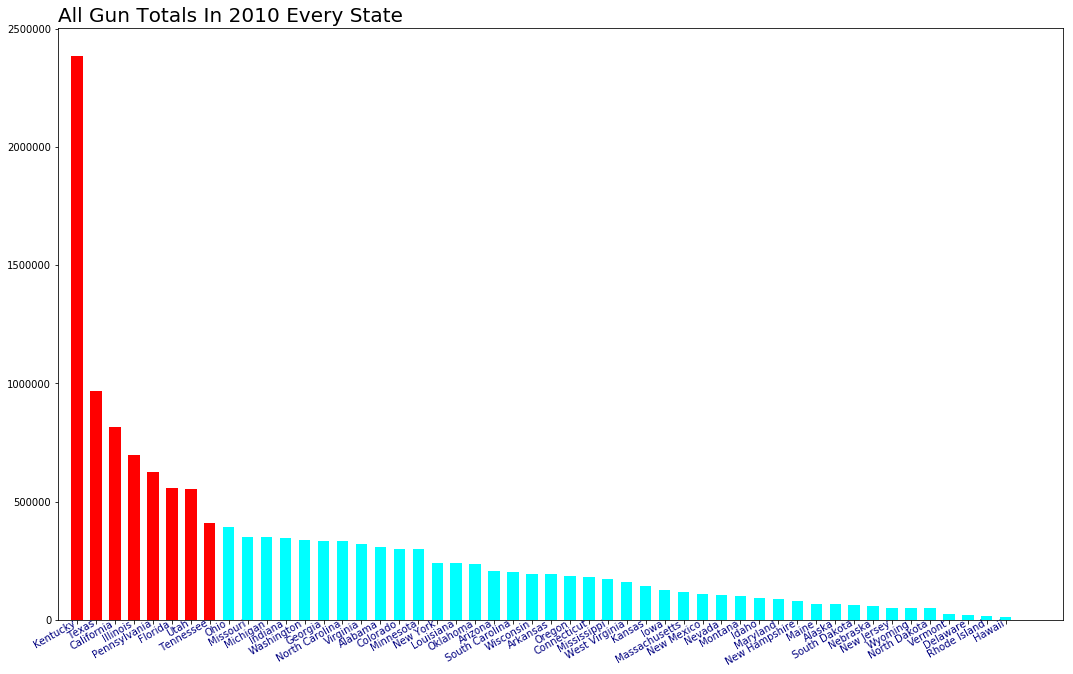

In [67]:
data_2010 = df_gun_2010.groupby("state")["totals"].sum().sort_values(ascending=False)
top_state_2010 = data_2010.nlargest(8).index

colors = data_2010.index.to_series().apply(lambda x:  "#ff0000" if x in top_state_2010 else "#00ffff")
plt.figure(figsize=(18, 16*.68))
ax = plt.subplot()
ax.bar(data_2010.index, height=data_2010.values, color=colors, align="center", width=0.6)
ax.set_title("All Gun Totals In 2010 Every State", fontsize=20, loc="left")
ax.set_xlim(-1, 52)

# rotation the xlabel
for i in ax.xaxis.get_majorticklabels():
    i.set_rotation(30)
    i.set_horizontalalignment("right")
    i.set_verticalalignment("baseline")
    i.set_size(10)
    i.set_color("#000080")
plt.show()

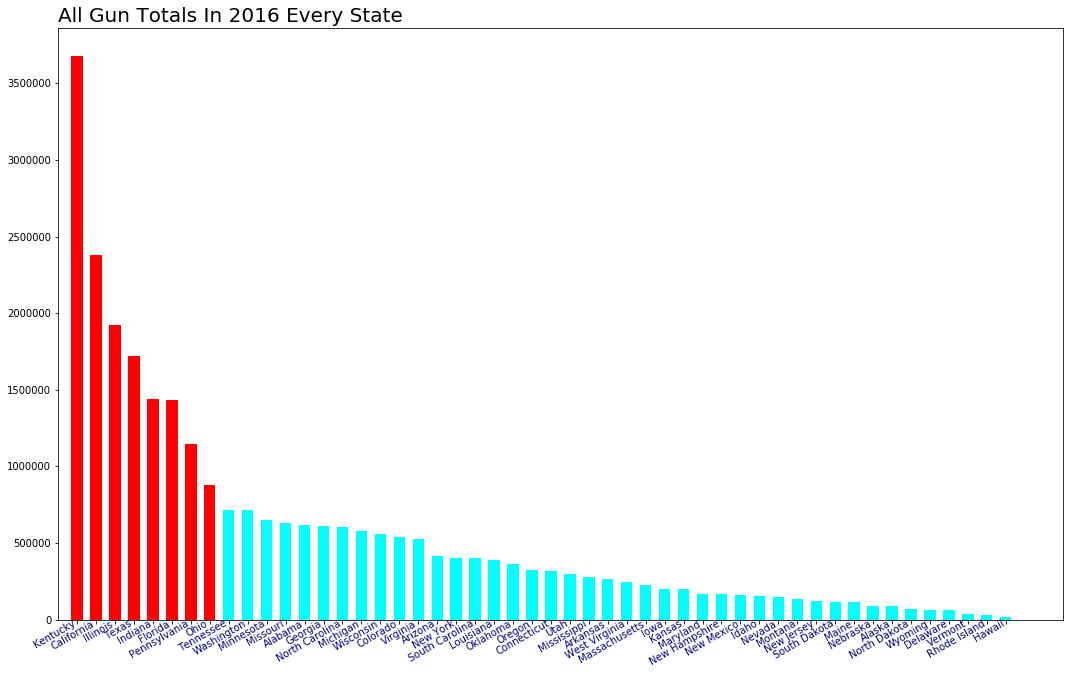

In [68]:
data_2016 = df_gun_2016.groupby("state")["totals"].sum().sort_values(ascending=False)
top_state_2016 = data_2016.nlargest(8).index

colors = data_2016.index.to_series().apply(lambda x:  "#ff0000" if x in top_state_2016 else "#00ffff")
plt.figure(figsize=(18, 16*.68))
ax = plt.subplot()
ax.bar(data_2016.index, height=data_2016.values, color=colors, align="center", width=0.6)
ax.set_title("All Gun Totals In 2016 Every State ", fontsize=20, loc="left")
ax.set_xlim(-1, 52)

# rotation the xlabel
for i in ax.xaxis.get_majorticklabels():
    i.set_rotation(30)
    i.set_horizontalalignment("right")
    i.set_verticalalignment("baseline")
    i.set_size(10)
    i.set_color("#000080")
plt.show()

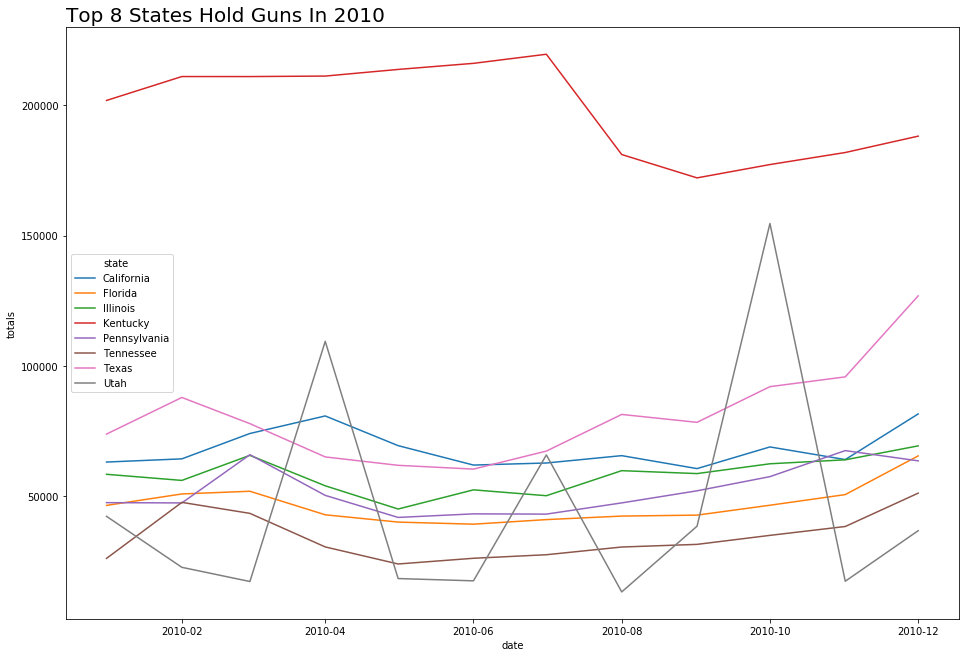

In [69]:
plt.figure(figsize=(16, 16*.68))
sn.lineplot(data=df_gun_2010.loc[df_gun_2010.state.map(lambda x: x in top_state_2010), :], x="date", y="totals", hue="state", )
plt.title("Top 8 States Hold Guns In 2010", fontsize=20, loc="left")
plt.show()

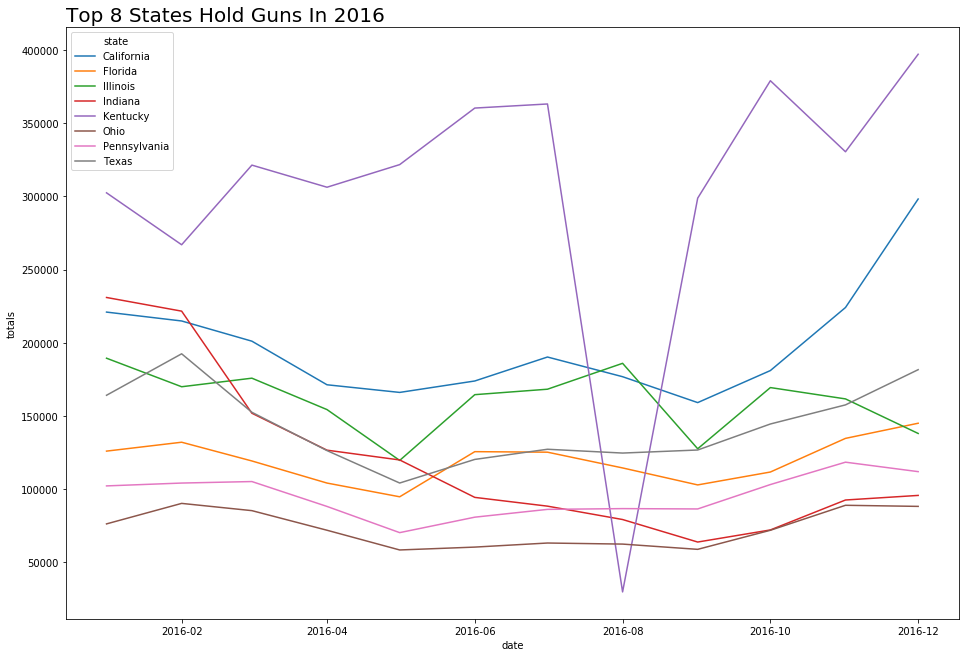

In [70]:
plt.figure(figsize=(16, 16*.68))
sn.lineplot(data=df_gun_2016.loc[df_gun_2016.state.map(lambda x: x in top_state_2016), :], x="date", y="totals", hue="state", )
plt.title("Top 8 States Hold Guns In 2016", fontsize=20, loc="left")
plt.show()

In [71]:
df_gun_2010.loc[df_gun_2010.state.map(lambda x: x in top_state_2010), :].head()

,state,date,totals,2010_Population,2010_FemalePercent,2010_HousingUnits,2010_PopulationPerSquare,rate
48,California,2010-01-01,63048,3.7254e+07,0.503,1.36801e+07,239.1,0.00169238
49,California,2010-02-01,64271,3.7254e+07,0.503,1.36801e+07,239.1,0.00172521
50,California,2010-03-01,74011,3.7254e+07,0.503,1.36801e+07,239.1,0.00198666
51,California,2010-04-01,80750,3.7254e+07,0.503,1.36801e+07,239.1,0.00216756
52,California,2010-05-01,69344,3.7254e+07,0.503,1.36801e+07,239.1,0.00186139


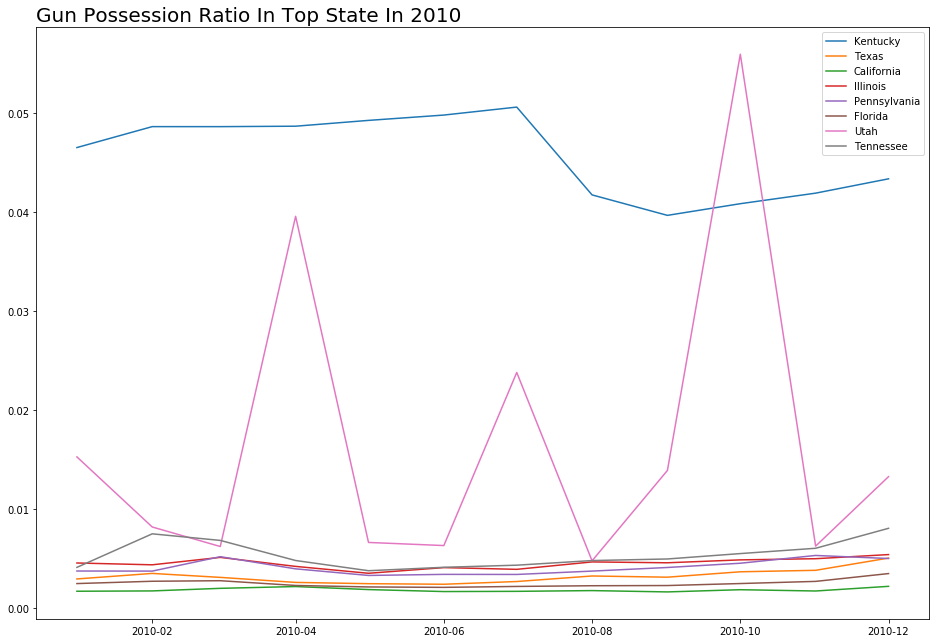

In [72]:
plt.figure(figsize=(16, 16*.68))
for column in top_state_2010:
    plt.plot(df_gun_2010.loc[df_gun_2010.state == column, "date"], df_gun_2010.loc[df_gun_2010.state == column, "rate"], label=column)

plt.title("Gun Possession Ratio In Top State In 2010", fontsize=20, loc="left")
plt.legend()
plt.show()

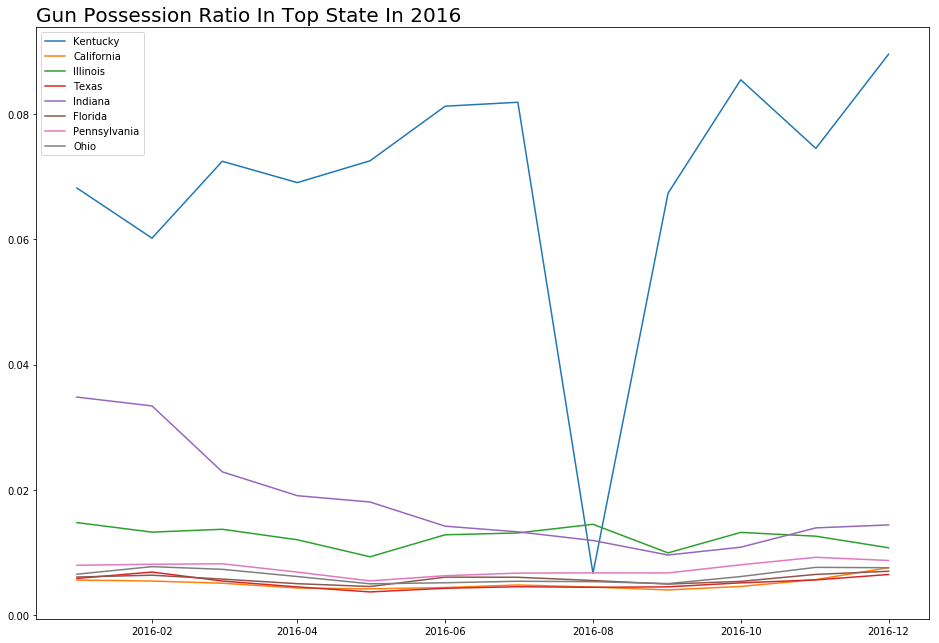

In [73]:
plt.figure(figsize=(16, 16*.68))
for column in top_state_2016:
    plt.plot(df_gun_2016.loc[df_gun_2016.state == column, "date"], df_gun_2016.loc[df_gun_2016.state == column, "rate"], label=column)

plt.title("Gun Possession Ratio In Top State In 2016", fontsize=20, loc="left")
plt.legend()
plt.show()

In [74]:
top_state_2016.difference(top_state_2010)

Index(['Indiana', 'Ohio'], dtype='object', name='state')

In [75]:
top_state_2010.difference(top_state_2016)

Index(['Tennessee', 'Utah'], dtype='object', name='state')

In [76]:
census_2010.head()

,2010_Population,2010_FemalePercent,2010_HousingUnits,2010_PopulationPerSquare
Alabama,4.77974e+06,0.515,2.17185e+06,94.4
Alaska,710231,0.48,306967,1.2
Arizona,6.39202e+06,0.503,2.84453e+06,56.3
Arkansas,2.91592e+06,0.509,1.3163e+06,56
California,3.7254e+07,0.503,1.36801e+07,239.1


In [77]:
df_gun_2010.head()

,state,date,totals,2010_Population,2010_FemalePercent,2010_HousingUnits,2010_PopulationPerSquare,rate
0,Alabama,2010-01-01,24397,4.77974e+06,0.515,2.17185e+06,94.4,0.00510426
1,Alabama,2010-02-01,30456,4.77974e+06,0.515,2.17185e+06,94.4,0.0063719
2,Alabama,2010-03-01,26403,4.77974e+06,0.515,2.17185e+06,94.4,0.00552395
3,Alabama,2010-04-01,20791,4.77974e+06,0.515,2.17185e+06,94.4,0.00434982
4,Alabama,2010-05-01,18752,4.77974e+06,0.515,2.17185e+06,94.4,0.00392323


In [78]:
report = "<p style='font: italic 30px Fira Sans, serif; color: #000080;'>Western states own much more guns each person</p> \
    <ul style='font: italic 25px Fira Sans, serif;'> \
        <li>At top 8 states, they owned much more guns.</li> \
        <li>In 2010, there were almost 5 guns per hundred people in Kentucky. At other states, there was less 1 gun</li> \
        <li>In 2016, top ratio was over 0.08, but rest other states almost own 2 gun per hundred people</li> \
        <li>In 2010, the top 8 states were</li> \
        <ul> \
            {} \
        <ul> \
    <ul>"


report_state = []
for i in top_state_2010:
    report_state.append("<li>{} had people {:0.0f}, and there are {} guns</li>".format(
        i, census_2010.loc[i, "2010_Population"], df_gun_2010.loc[df_gun_2010["state"] == i, "totals"].sum()))
report_state = "".join(report_state)
report = report.format(report_state)
display.display_html(report, raw=True)

Western states own much more guns each person At top 8 states, they owned much more guns. In 2010, there were almost 5 guns per hundred people in Kentucky. At other states, there was less 1 gun In 2016, top ratio was over 0.08, but rest other states almost own 2 gun per hundred people In 2010, the top 8 states were Kentucky had people 4339367, and there are 2385579 guns Texas had people 25145561, and there are 968071 guns California had people 37253956, and there are 816399 guns Illinois had people 12830632, and there are 695300 guns Pennsylvania had people 12702379, and there are 626677 guns Florida had people 18801310, and there are 559347 guns Utah had people 2763885, and there are 553134 guns Tennessee had people 6346105, and there are 411024 guns

In [79]:
permit_rate = (df_gun_types.groupby(["date", "state"])["permit_all"].sum() / 
               df_gun_types.groupby(["date", "state"])["totals"].sum()).reset_index()
permit_rate.columns = ["date", "state", "permit_rate"]

In [80]:
high_rate_state = permit_rate.groupby("state")["permit_rate"].sum().nlargest(3).index

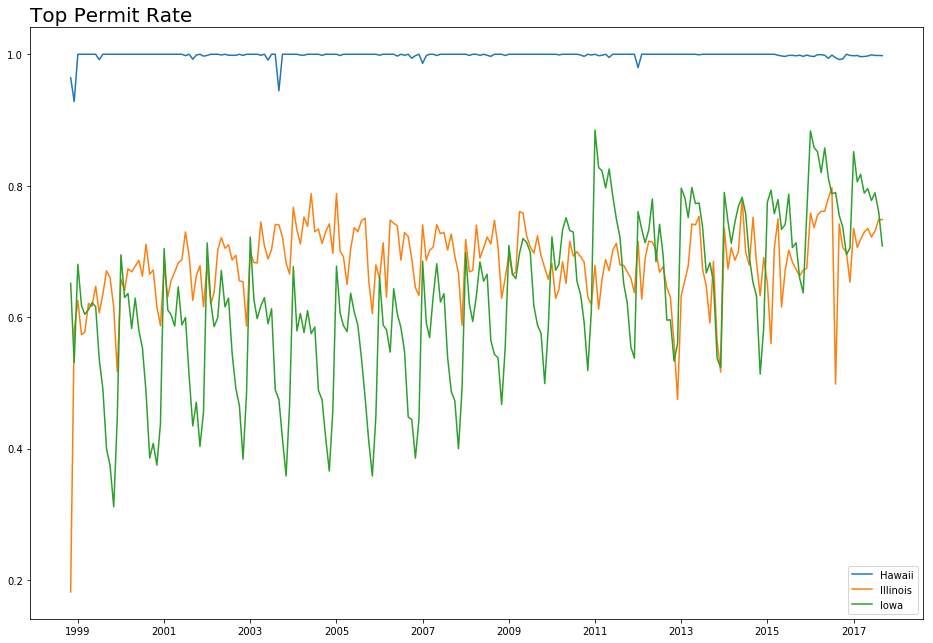

In [81]:
plt.figure(figsize=(16, 16*.68))
for i in high_rate_state:
    plt.plot(permit_rate.date.unique(), permit_rate[permit_rate["state"]==i].loc[:, "permit_rate"], label=i)
    
plt.title("Top Permit Rate", fontsize=20, loc="left")
plt.legend()
plt.show()

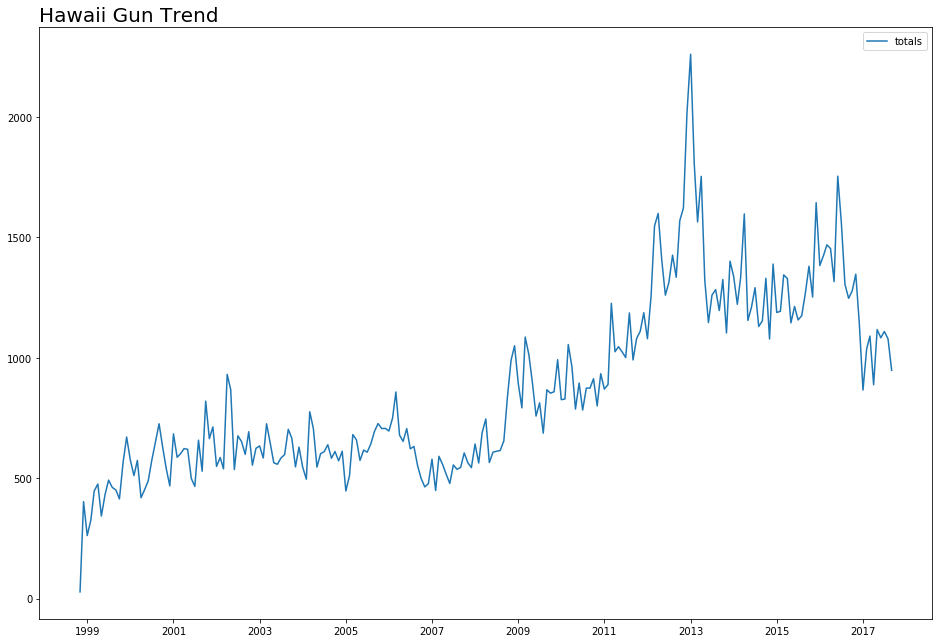

In [82]:
plt.figure(figsize=(16, 16*.68))
plt.plot(df_gun_types.date.unique(), df_gun_types[df_gun_types["state"]=="Hawaii"].loc[:, "totals"])
    
plt.title("Hawaii Gun Trend", fontsize=20, loc="left")
plt.legend()
plt.show()

<font color="blue">**分析结论：**

1. 枪支购买的整体趋势是什么？

    自 1998 年 11 月开始统计数据起，整体的强制购买数量都是随着年份变化而增减
    
2. 不同枪支类型的购买趋势

    长枪和手枪的市场占有比例最高，其次还有部分购买的枪支还在审核中，这三种类型的枪支占据了整个枪支比例的 90% 以上
    
3. 什么样的人口普查数据与人均拥有枪支量高度相关

    西部州的枪支购买量和购买率都是最高的，其中 Kentucky 在 2010 年和 2016 年中的人均枪支占有率都是最高的。紧接着的后续前 7 个州的人均持枪率都远低于 Kentucky
    
4. 哪些州的枪支注册增长率最高
    
    枪支注册增长率最高的是 Hawaii 州，主要是因为该州的枪支流通量少
</font>

<a id='conclusions'></a>
## 结论

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

> 如需将报告导出到工作区，你可以运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，来提交你的项目。恭喜你！

In [83]:
raise

RuntimeError: No active exception to reraise

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

<a id="reference"></a>
## 参考
1. [Python下如何把带有千位分隔符的浮点数字符串形式转化为数字](https://blog.csdn.net/esrichinacd/article/details/38899137)